In [1]:
import geopandas as gp
import pandas as pd
import numpy as np
import os
import json
import pylab as pl
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import geopandas as gpd
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#cd data

In [3]:
synar = pd.read_csv('synar_10-13_prox_geocoded.csv')

In [4]:
print synar.columns

Index([u'Outlet.ID', u'storen_year', u'storen', u'Inspection.Date',
       u'Time.of.Visit', u'Investigator.ID.number', u'Investigator.Name',
       u'Investigator.Age', u'Gender', u'Adults.Supervisor',
       u'Name.of.Police.Officer.s.', u'Outlet.name',
       u'Outlet.building..number', u'Outlet.Street.name', u'Outlet.Quadrant',
       u'Outlet.City', u'Outlet.State', u'Zip.code', u'Ward',
       u'Name.or.address.correction.', u'Type.of.outlet', u'Sales.mode',
       u'Is.outlet.eligible.', u'If..no..check.one.of.the.following.reasons',
       u'If.outlet.is.eligible..was.inspection.completed.',
       u'If.no..check.one.of.the.following.reasons.',
       u'If.inspection.was.completed..was.buy.attempt.successful..Sale.M.',
       u'Age.asked.', u'ID.requested.', u'Product', u'Note.',
       u'Sales.Clerk.name', u'Sales.Clerk.Sex', u'Sales.Clerk.Age.Range.',
       u'Sales.Clerk.Race.Ethnicity', u'Illegal.Vending.Machine.Present',
       u'Illegal.to.Sell.Tolbacco.to.persons.under.1

In [5]:
#rename: violation, 

#violation, ward,year', 'category
synar = synar.rename(columns=
                     {'Is.outlet.eligible.': 'Is.outlet_eligible',
                     'Age.asked.':'Age_asked', 
                      'ID.requested.':'ID_requested'})


## 2010

In [6]:
synar['violation2010'] = synar['violation'][synar['year']==2010]
synar['ward2010'] = synar['Ward'][synar['year']==2010]
synar['category2010'] = synar['category'][synar['year']==2010]
synar['Age_asked2010'] = synar['Age_asked'][synar['year']==2010]
synar['ID_requested2010'] = synar['ID_requested'][synar['year']==2010]

## 2011

In [7]:
synar['violation2011'] = synar['violation'][synar['year']==2011]
synar['ward2011'] = synar['Ward'][synar['year']==2011]
synar['category2011'] = synar['category'][synar['year']==2011]
synar['Age_asked2011'] = synar['Age_asked'][synar['year']==2011]
synar['ID_requested2011'] = synar['ID_requested'][synar['year']==2011]

## 2012

In [8]:
synar['violation2012'] = synar['violation'][synar['year']==2012]
synar['ward2012'] = synar['Ward'][synar['year']==2012]
synar['category2012'] = synar['category'][synar['year']==2012]
synar['Age_asked2012'] = synar['Age_asked'][synar['year']==2012]
synar['ID_requested2012'] = synar['ID_requested'][synar['year']==2012]

## 2013

In [9]:
synar['violation2013'] = synar['violation'][synar['year']==2013]
synar['ward2013'] = synar['Ward'][synar['year']==2013]
synar['category2013'] = synar['category'][synar['year']==2013]
synar['Age_asked2013'] = synar['Age_asked'][synar['year']==2013]
synar['ID_requested2013'] = synar['ID_requested'][synar['year']==2013]

In [10]:
#print synar.violation2013

In [11]:
synar['Outlet_Street_name'] = synar['Outlet.Street.name'] 
#synar['Name_or_address_correction'] = synar['Name.or.address.correction'] 
synar['Type_of_outlet'] = synar['Type.of.outlet']

In [12]:
print synar.Outlet_Street_name.head(2)

0    11th
1    11th
Name: Outlet_Street_name, dtype: object


In [13]:
pd.unique(synar.Type_of_outlet.ravel())

array(['Market', 'Carry Out/Convenience', 'Grocery Store', 'Gas Station',
       'Liquor Store', 'Bar/Lounge', 'Drug Store/Pharmacy', 'Restaurant',
       'Gift Shop', 'Other', 'Deli', nan, 'Cigar Shop', 'Outlet',
       'Record Store', 'Pool Bar', 'Hookah Bar', 'Hotel', 'Cigar Lounge',
       'Discount Mart', 'Pool Hall', 'Tobacco Shop', 'Tobacco Store'], dtype=object)

In [14]:
census = pd.read_csv('DEC_10_SF1_P3_with_ann.csv')

In [15]:
census.columns

Index([u'GEO_ID', u'Id2', u'Geography', u'Total:', u'White alone',
       u'Black or African American alone',
       u'American Indian and Alaska Native alone', u'Asian alone',
       u'Native Hawaiian and Other Pacific Islander alone',
       u'Some Other Race alone', u'Two or More Races'],
      dtype='object')

In [16]:
census = census.rename(columns={'Total:':'total'})
census = census.rename(columns={'Black or African American alone':'black'})

In [17]:
outletposse = pd.read_csv('outlet1081.csv')


## black_prec_binary- 1= => 56% 0= =<56%

### outletposse_merged2 is the final file merged for every year (2010-2013) data 
### + 56% black population 

In [18]:
#len(outletposse_merged2)

In [19]:
len(outletposse)

1081

### Before merge- 1081 after merge- 1167

In [20]:
#print outletposse_merged2.head(4)

NameError: name 'outletposse_merged2' is not defined

In [23]:
#print outletposse_merged2.columns.values.tolist()

In [24]:
#print census.black.head(6)

In [25]:
census['black_prec']= (census['black']/census['total'])*100

In [26]:
print census.black_prec.head(5)

0    1.563663
1    2.456647
2    1.375752
3    3.400000
4    6.613892
Name: black_prec, dtype: float64


In [27]:
census['black_prec_binary']= 1*(census['black_prec']>=56)

### black_prec_binary = 1 for bigger than 56% black population 

In [28]:
print census.black_prec_binary.head(1)

0    0
Name: black_prec_binary, dtype: int64


In [29]:
#matchaddr
print outletposse.columns.values.tolist()
outletposse = outletposse.rename(columns={'Total:':'total'})


['OBJECTID', 'target_fid', 'fid_1', 'fid_1_1', 'cust_num', 'decription', 'corp_name', 'trade_name', 'name', 'address', 'renewal_pe', 'addrid', 'score', 'addrerr', 'geoid', 'store_id', 'matchaddr', 'objectid_12', 'objectid_1', 'objectid_2', 'objectid_12_13', 'type', 'type_other', 'storeopen', 'namechg', 'totalads', 'ad_menthol', 'ad_lcc', 'ad_detach', 'price_any', 'price_low', 'price_bran', 'price_bra0', 'price_open', 'price_pack', 'price_spec', 'tax_ext', 'promo_ext_', 'promo_ext0', 'promo_ext1', 'adlevel_ex', 'ageofsale', 'registers', 'tobacco_an', 'lowprice', 'price_bra1', 'price_bra2', 'open_brand', 'special_lo', 'tax_lowpri', 'promo_int_', 'promo_int0', 'promo_int1', 'adlevel_in', 'sell_new', 'place_new', 'ads_new', 'pricead_ne', 'special_ne', 'taxad_new', 'pricenoad2', 'taxnoad_ne', 'promoad_ne', 'promoad_n0', 'promoad_n1', 'single_lcc', 'typesingle', 'typesingl0', 'typesingl1', 'place_sing', 'pack_lcc', 'typepack_l', 'typepack_0', 'typepack_1', 'place_lccp', 'sell_lcc', 'place_lc

In [30]:
#matchaddr
print synar.columns.values.tolist()

['Outlet.ID', 'storen_year', 'storen', 'Inspection.Date', 'Time.of.Visit', 'Investigator.ID.number', 'Investigator.Name', 'Investigator.Age', 'Gender', 'Adults.Supervisor', 'Name.of.Police.Officer.s.', 'Outlet.name', 'Outlet.building..number', 'Outlet.Street.name', 'Outlet.Quadrant', 'Outlet.City', 'Outlet.State', 'Zip.code', 'Ward', 'Name.or.address.correction.', 'Type.of.outlet', 'Sales.mode', 'Is.outlet_eligible', 'If..no..check.one.of.the.following.reasons', 'If.outlet.is.eligible..was.inspection.completed.', 'If.no..check.one.of.the.following.reasons.', 'If.inspection.was.completed..was.buy.attempt.successful..Sale.M.', 'Age_asked', 'ID_requested', 'Product', 'Note.', 'Sales.Clerk.name', 'Sales.Clerk.Sex', 'Sales.Clerk.Age.Range.', 'Sales.Clerk.Race.Ethnicity', 'Illegal.Vending.Machine.Present', 'Illegal.to.Sell.Tolbacco.to.persons.under.18.years.of.age..sign', 'Single.cigarettes.visible.for.sale', 'Cigarettes.kept.in.locked.case', 'Youth.Inspector.Initial', 'Adult.Inspector.Signa

## print census.columns.values.tolist()

### Object ID : created with GIS. ** storen is the indentifier 
### m100: normalized to meters, use those variabels as proximities

In [31]:
synar.columns

Index([u'Outlet.ID', u'storen_year', u'storen', u'Inspection.Date',
       u'Time.of.Visit', u'Investigator.ID.number', u'Investigator.Name',
       u'Investigator.Age', u'Gender', u'Adults.Supervisor', 
       ...
       u'category2012', u'Age_asked2012', u'ID_requested2012',
       u'violation2013', u'ward2013', u'category2013', u'Age_asked2013',
       u'ID_requested2013', u'Outlet_Street_name', u'Type_of_outlet'],
      dtype='object', length=122)

In [32]:
print synar.head()

   Outlet.ID  storen_year  storen Inspection.Date        Time.of.Visit  \
0    2011001          127     374      2010-07-22  2015-10-28 11:05:00   
1    2011002          347     928      2010-07-22  2015-10-28 10:58:00   
2    2011003           21      88      2010-07-22  2015-10-28 10:47:00   
3    2011004          177     499      2010-08-12  2015-10-28 12:48:00   
4    2011006          161     456      2010-07-19  2015-10-28 15:45:00   

   Investigator.ID.number Investigator.Name  Investigator.Age  Gender  \
0                       0                CW                15    Male   
1                       0                AK                15  Female   
2                       0                CW                15    Male   
3                       0                AK                16  Female   
4                       0                KK                16    Male   

  Adults.Supervisor          ...           category2012 Age_asked2012  \
0      Ashley Moore          ...           

In [33]:
print synar.storen.head()

0    374
1    928
2     88
3    499
4    456
Name: storen, dtype: int64


## Mean for miles var

In [34]:
print 'Playground Proximity Mean:', synar.playground_prox.mean() 
print 'Baseball Fields Mean:', synar.baseball_fields_prox.mean()
print 'Basketball Courts Mean:', synar.basketball_courts_prox.mean()
print 'Charter High School Mean:', synar.charter_high_school_prox.mean()
print 'Football Fields Mean:', synar.football_fields_prox.mean()
print 'Parks Mean:', synar.parks_prox.mean()
print 'Pool Spraypark Mean:', synar.pool_spraypark_prox.mean()
print 'Private High School Mean:', synar.private_high_school_prox.mean()
print 'Public High School Mean:', synar.public_high_school_prox.mean() 
print 'Public Housing Maen:', synar.public_housing_prox.mean()
print 'Recreation Area Mean', synar.recreation_area_prox.mean()
print 'Roadway Green Space Mean:', synar.roadway_green_space_prox.mean() 
print 'Soccer Fields Mean', synar.soccer_fields_prox.mean()
print 'Tennis Court Mean', synar.tennis_court_prox.mean()
print 'Track Mean:', synar.track_prox.mean()    


Playground Proximity Mean: 0.496101498974
Baseball Fields Mean: 0.535370555071
Basketball Courts Mean: 0.552933953699
Charter High School Mean: 1.27556083375
Football Fields Mean: 2.31025637022
Parks Mean: 0.528218912355
Pool Spraypark Mean: 0.905640933548
Private High School Mean: 1.263661571
Public High School Mean: 0.959009104062
Public Housing Maen: 0.761712795807
Recreation Area Mean 0.451753952233
Roadway Green Space Mean: 0.504504679679
Soccer Fields Mean 1.8143427584
Tennis Court Mean 0.60215585226
Track Mean: 1.82742071997


In [35]:
print synar.storen.tail()

1247    365
1248    632
1249    988
1250    197
1251    521
Name: storen, dtype: int64


## Mean for meter var

In [36]:
print 'Playground Proximity Mean:', synar.m100playground.mean() *100
print 'Baseball Fields Mean:', synar.m100baseball_fields.mean() *100
print 'Basketball Courts Mean:', synar.m100basketball_courts.mean() *100
print 'Charter High School Mean:', synar.m100charter_high_school.mean() *100
print 'Football Fields Mean:', synar.m100football_fields.mean() *100
print 'Parks Mean:', synar.m100parks.mean() *100
print 'Pool Spraypark Mean:', synar.m100pool_spraypark.mean() *100
print 'Private High School Mean:', synar.m100private_high_school.mean() *100
print 'Public High School Mean:', synar.m100public_high_school.mean() *100
print 'Public Housing Maen:', synar.m100public_housing.mean() *100
print 'Recreation Area Mean', synar.m100recreation_area.mean() *100
print 'Roadway Green Space Mean:', synar.m100roadway_green_space.mean() *100
print 'Soccer Fields Mean', synar.m100soccer_fields.mean() *100
print 'Tennis Court Mean', synar.m100tennis_court.mean() *100
print 'Track Mean:', synar.m100track.mean() *100

Playground Proximity Mean: 735.182603764
Baseball Fields Mean: 787.484171635
Basketball Courts Mean: 778.040115048
Charter High School Mean: 958.594836766
Football Fields Mean: 1012.72364348
Parks Mean: 752.54325983
Pool Spraypark Mean: 970.682480828
Private High School Mean: 985.287221285
Public High School Mean: 978.363983848
Public Housing Maen: 863.742638055
Recreation Area Mean 660.941091596
Roadway Green Space Mean: 703.073014085
Soccer Fields Mean 988.989526225
Tennis Court Mean 827.560366313
Track Mean: 1045.35280152


In [37]:
print 'Playground Proximity SD:', synar.m100playground.std() *100
print 'Baseball Fields SD:', synar.m100baseball_fields.std() *100
print 'Basketball Courts SD:', synar.m100basketball_courts.std() *100
print 'Charter High School SD:', synar.m100charter_high_school.std() *100
print 'Football Fields SD:', synar.m100football_fields.std() *100
print 'Parks SD:', synar.m100parks.std() *100
print 'Pool Spraypark SD:', synar.m100pool_spraypark.std() *100
print 'Private High School SD:', synar.m100private_high_school.std() *100
print 'Public High School SD:', synar.m100public_high_school.std() *100
print 'Public Housing SD:', synar.m100public_housing.std() *100
print 'Recreation Area SD', synar.m100recreation_area.std() *100
print 'Roadway Green Space SD:', synar.m100roadway_green_space.std() *100 
print 'Soccer Fields SD:', synar.m100soccer_fields.std() *100
print 'Tennis Court SD:', synar.m100tennis_court.std() *100
print 'Track SD:', synar.m100track.std() *100

Playground Proximity SD: 360.008057381
Baseball Fields SD: 349.527826447
Basketball Courts SD: 370.802280355
Charter High School SD: 381.296261379
Football Fields SD: 387.552211701
Parks SD: 389.754759316
Pool Spraypark SD: 367.065304095
Private High School SD: 359.95427303
Public High School SD: 364.23365363
Public Housing SD: 361.319232432
Recreation Area SD 374.150370407
Roadway Green Space SD: 384.818468359
Soccer Fields SD: 354.127161833
Tennis Court SD: 362.980553359
Track SD: 350.11095851


## OLS LOGIT for mile variables 

## OLS LOGIT for meter variables 

In [38]:
synar['Inspection_Date'] = synar['Inspection.Date'] 

## Inspection_Date - the year that should be used for time measurment 

In [39]:
print synar.Inspection_Date.max()

2712-07-27


In [40]:
print synar.Inspection_Date.min()

inf


In [41]:
print synar.Inspection_Date.head()

0    2010-07-22
1    2010-07-22
2    2010-07-22
3    2010-08-12
4    2010-07-19
Name: Inspection_Date, dtype: object


In [42]:
print synar.Inspection_Date.tail()

1247    2013-07-18
1248    2013-07-18
1249    2013-07-19
1250    2013-07-25
1251    2013-07-21
Name: Inspection_Date, dtype: object


In [43]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [44]:
from pandas.tools.plotting import andrews_curves
plt.figure()

In [45]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['parks_prox', 'baseball_fields_prox', 'pool_spraypark_prox', 'tennis_court_prox'])

In [46]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108a54110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109905710>]], dtype=object)

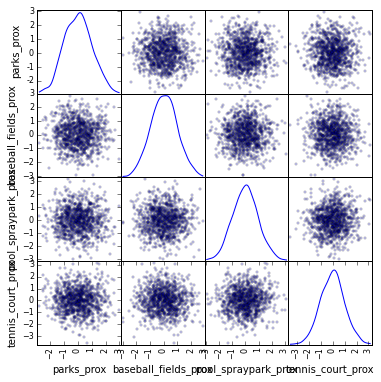

In [52]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [53]:
mod = smf.ols(formula='violation ~ m100playground + m100baseball_fields', data = synar).fit()

In [54]:
#no of columns
len(synar.columns)

123

In [55]:
#no of rows 
len(synar.index)

1252

In [56]:


#synar2 = pd.DataFrame(counts, columns = ['storen'])
#synar2 = synar2[synar2.size>1]

In [57]:
synar['Type_of_outlet'] = synar['Type.of.outlet'] 

In [58]:
print synar.Type_of_outlet.head(1)

0    Market
Name: Type_of_outlet, dtype: object


In [59]:
pd.unique(synar.Type_of_outlet.ravel())

array(['Market', 'Carry Out/Convenience', 'Grocery Store', 'Gas Station',
       'Liquor Store', 'Bar/Lounge', 'Drug Store/Pharmacy', 'Restaurant',
       'Gift Shop', 'Other', 'Deli', nan, 'Cigar Shop', 'Outlet',
       'Record Store', 'Pool Bar', 'Hookah Bar', 'Hotel', 'Cigar Lounge',
       'Discount Mart', 'Pool Hall', 'Tobacco Shop', 'Tobacco Store'], dtype=object)

In [60]:
synar['Liquor']= 1*(synar['Type_of_outlet']=='Liquor Store') 

In [61]:
synar['convin']= 1*(synar['Type_of_outlet']=='Carry Out/Convenience') 

## fix the mass retailer and resturant -bar categories- not & but OR (roght now it's a zero array) 

In [62]:
synar.head()

Outlet.ID  storen_year  storen Inspection.Date        Time.of.Visit  \
0    2011001          127     374      2010-07-22  2015-10-28 11:05:00   
1    2011002          347     928      2010-07-22  2015-10-28 10:58:00   
2    2011003           21      88      2010-07-22  2015-10-28 10:47:00   
3    2011004          177     499      2010-08-12  2015-10-28 12:48:00   
4    2011006          161     456      2010-07-19  2015-10-28 15:45:00   

   Investigator.ID.number Investigator.Name  Investigator.Age  Gender  \
0                       0                CW                15    Male   
1                       0                AK                15  Female   
2                       0                CW                15    Male   
3                       0                AK                16  Female   
4                       0                KK                16    Male   

  Adults.Supervisor   ...   violation2013 ward2013 category2013 Age_asked2013  \
0      Ashley Moore   ...             NaN      NaN          NaN           NaN   
1      Ashley Moore   ...             NaN      NaN          NaN           NaN   
2      Ashley Moore   ...             NaN      NaN          NaN           NaN   
3      Ashley Moore   ...             NaN      NaN          NaN           NaN   
4   Nichalas Parker   ...             NaN      NaN          NaN           NaN   

  ID_requested2013 Outlet_Street_name         Type_of_outlet  Inspection_Date  \
0              NaN               11th                 Market       2010-07-22   
1              NaN               11th  Carry Out/Convenience       2010-07-22   
2              NaN               11th          Grocery Store       2010-07-22   
3              NaN               11th  Carry Out/Convenience       2010-08-12   
4              NaN               14th  Carry Out/Convenience       2010-07-19   

   Liquor  convin  
0       0       0  
1       0       1  
2       0       0  
3       0       1  
4       0       1  

[5 rows x 125 columns]

In [139]:
synar['grocery']= 1*(synar['Type_of_outlet']=='Grocery Store') 
synar['GasStation']= 1*(synar['Type_of_outlet']=='Gas Station')
synar['Mass_retailer'] = np.zeros(len(synar['Type_of_outlet']))
synar['Mass_retailer'] = 1*(synar['Type_of_outlet'].isin(('Cigar Shop','Record Store','Gift Shop')))
synar[synar['Mass_retailer']==1]
synar['resturant_bar1'] = 1*(synar['Type_of_outlet'].isin(('Hookah Bar','Restaurant','Pool Bar','Deli')))
synar[synar['resturant_bar1']==1]


Outlet.ID  storen_year  storen Inspection.Date        Time.of.Visit  \
60     2011069          287     786      2010-07-22  2015-10-28 14:37:00   
95     2011107          176     495      2010-07-26  2015-10-28 11:41:00   
105    2011117           72     229      2010-07-23  2015-10-28 15:35:00   
176    2011194          250     690      2010-07-26  2015-10-28 11:17:00   
183    2011201          295     812      2010-07-26  2015-10-28 15:03:00   
205    2011224          276     752      2010-07-26  2015-10-28 15:24:00   
312    2011337           54     181      2010-07-30  2015-10-28 11:43:00   
411    2012023          430     105      2011-08-09  2015-10-28 15:35:00   
417    2012029          425      87      2011-08-10  2015-10-28 02:54:00   
421    2012033          417      68      2011-08-10  2015-10-28 15:37:00   
472    2012084          647     747      2011-08-09  2015-10-28 12:03:00   
569    2012187          719     960      2011-08-19  2015-10-28 14:45:00   
574    2012192          660     776      2011-08-19  2015-10-28 14:53:00   
586    2012204          649     751      2011-08-17  2015-10-28 11:39:00   
811    2013058          849     495      2012-07-24  2015-10-28 12:02:00   
813    2013060          858     564      2012-07-24  2015-10-28 11:55:00   

     Investigator.ID.number Investigator.Name  Investigator.Age  Gender  \
60                        0                JG                16    Male   
95                        0                DW                17    Male   
105                       0                JQ                17  Female   
176                       0                KW                15  Female   
183                       0                TO                17    Male   
205                       0                JQ                17  Female   
312                       0                SR                16  Female   
411                       0                TW                15    Male   
417                       0                AE                15    Male   
421                       0                AE                15    Male   
472                       0                JG                17    Male   
569                       0                DJ                15  Female   
574                       0                DJ                15  Female   
586                       0                KK                17    Male   
811                       0                LE                16  Female   
813                       0                LE                16  Female   

    Adults.Supervisor       ...         Outlet_Street_name Type_of_outlet  \
60    Nichalas Parker       ...                       15th     Restaurant   
95    Nichalas Parker       ...                          K           Deli   
105   Nichalas Parker       ...                          M     Restaurant   
176      Ashley Moore       ...             Georgia Avenue           Deli   
183      Ashley Moore       ...             Georgia Avenue     Restaurant   
205   Nichalas Parker       ...                       12th     Restaurant   
312   Nichalas Parker       ...        Pennsylvania Avenue     Restaurant   
411    Jasmine Quande       ...              Columbia Road       Pool Bar   
417    Jasmine Quande       ...         Connecticut Avenue       Pool Bar   
421    Jasmine Quande       ...             Florida Avenue     Hookah Bar   
472   Deonte Williams       ...         Connecticut Avenue     Restaurant   
569   Deonte Williams       ...             Georgia Avenue     Restaurant   
574   Deonte Williams       ...             Georgia Avenue     Restaurant   
586   Deonte Williams       ...                       12th     Restaurant   
811   Jasmine Quander       ...                          K           Deli   
813   Jasmine Quander       ...                          L           Deli   

    Inspection_Date Liquor convin grocery GasStation  Mass_retailer  \
60       2010-07-22      0      0       0          0   

In [103]:
outletposse_merged = pd.merge(synar, census, how='inner', on=['GEO_ID'])


In [104]:
outletposse_merged2 = pd.merge(outletposse_merged, outletposse, how='inner', on=['matchaddr'])

## logit for   violation and  mass retailer

In [67]:

#mod4 = smf.logit(formula='violation ~ Mass_retailer', data = synar).fit()

array(['Market', 'Carry Out/Convenience', 'Grocery Store', 'Gas Station',
       'Liquor Store', 'Bar/Lounge', 'Drug Store/Pharmacy', 'Restaurant',
       'Gift Shop', 'Other', 'Deli', nan, 'Cigar Shop', 'Outlet',
       'Record Store', 'Pool Bar', 'Hookah Bar', 'Hotel', 'Cigar Lounge',
       'Discount Mart', 'Pool Hall', 'Tobacco Shop', 'Tobacco Store'], dtype=object)

In [68]:
#print np.exp(mod4.params)

## logit for violation and grocery 

In [69]:

mod3 = smf.logit(formula='violation ~ grocery', data = synar).fit()
print(mod3.summary())

Optimization terminated successfully.
         Current function value: 0.328058
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              violation   No. Observations:                 1252
Model:                          Logit   Df Residuals:                     1250
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               0.0005251
Time:                        12:36:43   Log-Likelihood:                -410.73
converged:                       True   LL-Null:                       -410.94
                                        LLR p-value:                    0.5112
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1676      0.096    -22.680      0.000        -2.355    -1.980
grocery       -0.3005      0.

# odds ratio

In [70]:

print np.exp(mod3.params)

Intercept    0.114447
grocery      0.740483
dtype: float64


## logit for violation and gas station

In [71]:
mod2 = smf.logit(formula='violation ~ GasStation', data = synar).fit()
print(mod2.summary())

Optimization terminated successfully.
         Current function value: 0.325961
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              violation   No. Observations:                 1252
Model:                          Logit   Df Residuals:                     1250
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.006914
Time:                        12:36:46   Log-Likelihood:                -408.10
converged:                       True   LL-Null:                       -410.94
                                        LLR p-value:                   0.01713
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2667      0.103    -22.109      0.000        -2.468    -2.066
GasStation     0.6393      0.

In [72]:
print np.exp(mod2.params)

Intercept     0.103653
GasStation    1.895068
dtype: float64


## logit for violation and convinient store

In [74]:
mod1 = smf.logit(formula='violation ~ convin', data = synar).fit()
print np.exp(mod1.params)
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 0.328208
         Iterations 6
Intercept    0.115607
convin       0.956353
dtype: float64
                           Logit Regression Results                           
Dep. Variable:              violation   No. Observations:                 1252
Model:                          Logit   Df Residuals:                     1250
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               6.885e-05
Time:                        12:37:13   Log-Likelihood:                -410.92
converged:                       True   LL-Null:                       -410.94
                                        LLR p-value:                    0.8120
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1576      0.136    -15.823      

## logit violation and liquor

In [77]:

mod = smf.logit(formula='violation ~ Liquor', data = synar).fit()
print(mod.summary())
print np.exp(mod.params)

Optimization terminated successfully.
         Current function value: 0.325827
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              violation   No. Observations:                 1252
Model:                          Logit   Df Residuals:                     1250
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.007321
Time:                        12:37:25   Log-Likelihood:                -407.94
converged:                       True   LL-Null:                       -410.94
                                        LLR p-value:                   0.01417
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.0817      0.100    -20.865      0.000        -2.277    -1.886
Liquor        -0.6684      0.

## 2010 regressions 

violation 2010 and liquor 

In [80]:

logit_mod = smf.logit('violation2010 ~ Liquor', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.411834
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01951
Time:                        12:38:02   Log-Likelihood:                -147.02
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                   0.01558
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5841      0.158     -9.998      0.000        -1.895    -1.274
Liquor        -1.0549      0

violation 2010 and grocery 

In [82]:
logit_mod1 = smf.logit('violation2010 ~ grocery', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod1.params)

Optimization terminated successfully.
         Current function value: 0.415615
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01951
Time:                        12:38:12   Log-Likelihood:                -147.02
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                   0.01558
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5841      0.158     -9.998      0.000        -1.895    -1.274
Liquor        -1.0549      0

In [ ]:
#pd.unique(outletposse_merged2.Mass_retailer)

In [ ]:
# mass retailer - apears as all zeros... ?>

#logit_mod2 = smf.logit('violation2011 ~ Mass_retailer', data = outletposse_merged2).fit()

violation 2010 and gas station 

In [85]:
logit_mod2 = smf.logit(formula='violation2010 ~ GasStation', data = outletposse_merged2).fit()
print(logit_mod2.summary())
print np.exp(logit_mod2.params)
print np.exp(logit_mod2.params)

Optimization terminated successfully.
         Current function value: 0.412118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01883
Time:                        12:38:24   Log-Likelihood:                -147.13
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                   0.01748
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.8959      0.167    -11.319      0.000        -2.224    -1.568
GasStation     0.9468      0.

vioaltion 2010 convininent 

In [86]:
logit_mod3 = smf.logit(formula='violation2010 ~ convin', data = outletposse_merged2).fit()
print(logit_mod3.summary())
print np.exp(logit_mod3.params)


Optimization terminated successfully.
         Current function value: 0.418853
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.002796
Time:                        12:38:27   Log-Likelihood:                -149.53
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                    0.3598
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.6280      0.193     -8.420      0.000        -2.007    -1.249
convin        -0.2762      0.

In [97]:
logit_mod = smf.logit(formula='violation2010 ~ Mass_retailer', data = outletposse_merged2).fit()
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.420006
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               5.169e-05
Time:                        12:49:20   Log-Likelihood:                -149.94
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                    0.9009
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -1.7492      0.150    -11.642      0.000        -2.044    -1.455
Mass_retailer     0.

In [109]:
logit_mod121 = smf.logit(formula='violation2010 ~ resturant_bar1', data = outletposse_merged2).fit()
print(logit_mod121.summary())
print np.exp(logit_mod121.params)

Optimization terminated successfully.
         Current function value: 0.420006
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               5.169e-05
Time:                        12:53:05   Log-Likelihood:                -149.94
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                    0.9009
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.7492      0.150    -11.642      0.000        -2.044    -1.455
resturant_bar1   

violation 2010 and 56% african American pop 

In [111]:
logit_mod4 = smf.logit('violation2010 ~ black_prec_binary', data = outletposse_merged2).fit()
print
print(logit_mod4.summary())
print np.exp(logit_mod4.params)
print np.exp(logit_mod4.params)


Optimization terminated successfully.
         Current function value: 0.420020
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                  357
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               1.814e-05
Time:                        12:58:32   Log-Likelihood:                -149.95
converged:                       True   LL-Null:                       -149.95
                                        LLR p-value:                    0.9412
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -1.7567      0.201     -8.736      0.000        -2.151    -1.363
black_p

## 2011

violation 2011 and liquor 

In [112]:
logit_mod11 = smf.logit('violation2011 ~ Liquor', data = outletposse_merged2).fit()
print
print(logit_mod11.summary())
print np.exp(logit_mod11.params)


Optimization terminated successfully.
         Current function value: 0.235588
         Iterations 8

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.02015
Time:                        12:58:40   Log-Likelihood:                -83.398
converged:                       True   LL-Null:                       -85.114
                                        LLR p-value:                   0.06399
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.5221      0.222    -11.382      0.000        -2.956    -2.088
Liquor        -1.5210      1

violation 2011 and convinient store 

In [113]:
logit_mod12 = smf.logit('violation2011 ~ convin', data = outletposse_merged2).fit()
print
print(logit_mod12.summary())
print np.exp(logit_mod12.params)

Optimization terminated successfully.
         Current function value: 0.239972
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.001922
Time:                        12:58:52   Log-Likelihood:                -84.950
converged:                       True   LL-Null:                       -85.114
                                        LLR p-value:                    0.5674
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.8258      0.364     -7.766      0.000        -3.539    -2.113
convin         0.2558      0

violation 2011 and grocery

In [159]:
logit_mod13 = smf.logit('violation2011 ~ grocery', data = outletposse_merged2).fit()
print
print(logit_mod13.summary())
print np.exp(logit_mod13.params)

         Current function value: 0.239478
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.003976
Time:                        14:20:40   Log-Likelihood:                -84.775
converged:                      False   LL-Null:                       -85.114
                                        LLR p-value:                    0.4107
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.6514      0.216    -12.290      0.000        -3.074    -2.229
grocery      -25.2921   5.23e+05  -4.84e-05      1.000     -1.02

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


violation 2011 and gas station 

In [115]:
logit_mod14 = smf.logit('violation2011 ~ GasStation', data = outletposse_merged2).fit()
print
print(logit_mod14.summary())
print np.exp(logit_mod14.params)

Optimization terminated successfully.
         Current function value: 0.236111
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01798
Time:                        12:59:02   Log-Likelihood:                -83.583
converged:                       True   LL-Null:                       -85.114
                                        LLR p-value:                   0.08020
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.8167      0.243    -11.608      0.000        -3.292    -2.341
GasStation     1.0250      0

violation 2011 and African American 56%

In [118]:
logit_mod15 = smf.logit('violation2011 ~ black_prec_binary', data = outletposse_merged2).fit()
print
print(logit_mod15.summary())
print np.exp(logit_mod15.params)

Optimization terminated successfully.
         Current function value: 0.240415
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               7.807e-05
Time:                        12:59:20   Log-Likelihood:                -85.107
converged:                       True   LL-Null:                       -85.114
                                        LLR p-value:                    0.9082
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -2.6445      0.287     -9.213      0.000        -3.207    -2.082
black_p

In [119]:
logit_mod151 = smf.logit('violation2011 ~ Mass_retailer', data = outletposse_merged2).fit()
print
print(logit_mod151.summary())
print np.exp(logit_mod151.params)

         Current function value: 0.239478
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.003976
Time:                        12:59:45   Log-Likelihood:                -84.775
converged:                      False   LL-Null:                       -85.114
                                        LLR p-value:                    0.4107
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -2.6514      0.216    -12.290      0.000        -3.074    -2.229
Mass_retailer   -25.2921   5.23e+05  -4.84e-05      1.0

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [120]:
logit_mod515 = smf.logit('violation2011 ~ resturant_bar', data = outletposse_merged2).fit()
print
print(logit_mod515.summary())
print np.exp(logit_mod515.params)

         Current function value: 0.239285
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                  354
Model:                          Logit   Df Residuals:                      352
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.004778
Time:                        13:00:27   Log-Likelihood:                -84.707
converged:                      False   LL-Null:                       -85.114
                                        LLR p-value:                    0.3671
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -2.6483      0.216    -12.274      0.000        -3.071    -2.225
resturant_bar   -22.1040   9.68e+04     -0.000      1.0

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## 2012

violation 2012 and liqour

In [121]:
logit_mod16 = smf.logit('violation2012 ~ Liquor', data = outletposse_merged2).fit()
print
print(logit_mod16.summary())
print np.exp(logit_mod16.params)

Optimization terminated successfully.
         Current function value: 0.282470
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               1.157e-06
Time:                        13:00:55   Log-Likelihood:                -51.974
converged:                       True   LL-Null:                       -51.975
                                        LLR p-value:                    0.9913
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4204      0.301     -8.035      0.000        -3.011    -1.830
Liquor        -0.0074      0

violation 2012 and convinient 

In [122]:
logit_mod17 = smf.logit('violation2012 ~ convin', data = outletposse_merged2).fit()
print
print(logit_mod17.summary())
print np.exp(logit_mod17.params)

Optimization terminated successfully.
         Current function value: 0.281820
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.002304
Time:                        13:01:01   Log-Likelihood:                -51.855
converged:                       True   LL-Null:                       -51.975
                                        LLR p-value:                    0.6246
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2900      0.371     -6.172      0.000        -3.017    -1.563
convin        -0.2639      0

violation 2012 and grocery 

In [123]:
logit_mod18 = smf.logit('violation2012 ~ grocery', data = outletposse_merged2).fit()
print
print(logit_mod18.summary())
print np.exp(logit_mod18.params)

Optimization terminated successfully.
         Current function value: 0.281637
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.002950
Time:                        13:01:10   Log-Likelihood:                -51.821
converged:                       True   LL-Null:                       -51.975
                                        LLR p-value:                    0.5798
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4547      0.279     -8.814      0.000        -3.001    -1.909
grocery        0.6629      1

violation 2012 and gas station 

In [124]:
logit_mod19 = smf.logit('violation2012 ~ GasStation', data = outletposse_merged2).fit()
print
print(logit_mod19.summary())
print np.exp(logit_mod19.params)

Optimization terminated successfully.
         Current function value: 0.282207
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               0.0009310
Time:                        13:01:15   Log-Likelihood:                -51.926
converged:                       True   LL-Null:                       -51.975
                                        LLR p-value:                    0.7557
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4523      0.289     -8.484      0.000        -3.019    -1.886
GasStation     0.2551      0

violation 2012 African American 56%

In [125]:
logit_mod20 = smf.logit('violation2012 ~ black_prec_binary', data = outletposse_merged2).fit()
print
print(logit_mod20.summary())
print np.exp(logit_mod20.params)

Optimization terminated successfully.
         Current function value: 0.274530
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.02811
Time:                        13:01:20   Log-Likelihood:                -50.513
converged:                       True   LL-Null:                       -51.975
                                        LLR p-value:                   0.08737
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -2.9444      0.459     -6.417      0.000        -3.844    -2.045
black_p

In [140]:
logit_mod20 = smf.logit('violation2012 ~ resturant_bar', data = outletposse_merged2).fit()
print
print(logit_mod20.summary())
print np.exp(logit_mod20.params)

         Current function value: 0.281542
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.003286
Time:                        13:21:57   Log-Likelihood:                -51.804
converged:                      False   LL-Null:                       -51.975
                                        LLR p-value:                    0.5589
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -2.4099      0.270     -8.941      0.000        -2.938    -1.882
resturant_bar    -6.5295     61.762     -0.106      0.9

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## 2013

violation 2013 and liquor 

In [127]:
logit_mod21 = smf.logit('violation2013 ~ Liquor', data = outletposse_merged2).fit()
print
print(logit_mod21.summary())
print np.exp(logit_mod21.params)

Optimization terminated successfully.
         Current function value: 0.322974
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.001517
Time:                        13:14:16   Log-Likelihood:                -87.849
converged:                       True   LL-Null:                       -87.982
                                        LLR p-value:                    0.6054
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1578      0.220     -9.798      0.000        -2.589    -1.726
Liquor        -0.2845      0

violation 2013 and convient 

In [128]:
logit_mod22 = smf.logit('violation2013 ~ convin', data = outletposse_merged2).fit()
print
print(logit_mod22.summary())
print np.exp(logit_mod22.params)

Optimization terminated successfully.
         Current function value: 0.322549
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.002828
Time:                        13:14:23   Log-Likelihood:                -87.733
converged:                       True   LL-Null:                       -87.982
                                        LLR p-value:                    0.4805
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.3795      0.331     -7.199      0.000        -3.027    -1.732
convin         0.2928      0

violation 2013 and grocery 

In [129]:
logit_mod23 = smf.logit('violation2013 ~ grocery', data = outletposse_merged2).fit()
print
print(logit_mod23.summary())
print np.exp(logit_mod23.params)

Optimization terminated successfully.
         Current function value: 0.323396
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               0.0002125
Time:                        13:14:27   Log-Likelihood:                -87.964
converged:                       True   LL-Null:                       -87.982
                                        LLR p-value:                    0.8467
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.1972      0.207    -10.629      0.000        -2.602    -1.792
grocery       -0.2007      1

violation 2013 and gas station 

In [130]:
logit_mod24 = smf.logit('violation2013 ~ GasStation', data = outletposse_merged2).fit()
print
print(logit_mod24.summary())
print np.exp(logit_mod24.params)

Optimization terminated successfully.
         Current function value: 0.323380
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:               0.0002594
Time:                        13:14:31   Log-Likelihood:                -87.959
converged:                       True   LL-Null:                       -87.982
                                        LLR p-value:                    0.8308
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.2201      0.215    -10.330      0.000        -2.641    -1.799
GasStation     0.1407      0

violation 2013 and African American 56%

In [131]:
logit_mod25 = smf.logit('violation2013 ~ black_prec_binary', data = outletposse_merged2).fit()
print
print(logit_mod25.summary())
print np.exp(logit_mod25.params)

Optimization terminated successfully.
         Current function value: 0.319098
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01350
Time:                        13:14:35   Log-Likelihood:                -86.795
converged:                       True   LL-Null:                       -87.982
                                        LLR p-value:                    0.1233
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -2.5294      0.313     -8.073      0.000        -3.143    -1.915
black_p

In [133]:
logit_mod25 = smf.logit('violation2013 ~ Mass_retailer', data = outletposse_merged2).fit()
print
print(logit_mod25.summary())
print np.exp(logit_mod25.params)

         Current function value: 0.323079
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2013   No. Observations:                  272
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                0.001191
Time:                        13:15:15   Log-Likelihood:                -87.878
converged:                      False   LL-Null:                       -87.982
                                        LLR p-value:                    0.6472
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -2.2013      0.203    -10.854      0.000        -2.599    -1.804
Mass_retailer   -23.1053   3.13e+05  -7.39e-05      1.0

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### NO RESTURANT_BAR CATEGORY INSPECTED ON 2013

## logit for violation per year = retail type +high school proximity 

## 2010

### high school prox

In [132]:
logit_mod = smf.logit('violation2010 ~ Liquor + m100public_high_school + m100charter_high_school+ m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.295286
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   26
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.3122
Time:                        13:14:39   Log-Likelihood:                -7.6774
converged:                      False   LL-Null:                       -11.162
                                        LLR p-value:                    0.1375
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -4.7719      6.286     -0.759      0.448       -17.092     7.548
Liquor                   

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [185]:

#m100charter_high_school===== does not exsits for 2011?? 

logit_mod13 = smf.logit('violation2010 ~ grocery+ m100public_high_school+m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod13.summary())
print np.exp(logit_mod13.params)

Optimization terminated successfully.
         Current function value: 0.349079
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   95
Model:                          Logit   Df Residuals:                       91
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1255
Time:                        14:41:34   Log-Likelihood:                -33.163
converged:                       True   LL-Null:                       -37.923
                                        LLR p-value:                   0.02311
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -6.7384      1.928     -3.495      0.000       -10.517

## 2011

In [184]:
#synar[synar['violation2011']==1]

In [186]:
logit_mod = smf.logit('violation2010 ~ GasStation + m100public_high_school + m100charter_high_school+ m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.317042
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   26
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.2615
Time:                        14:41:45   Log-Likelihood:                -8.2431
converged:                      False   LL-Null:                       -11.162
                                        LLR p-value:                    0.2115
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -5.0281      6.430     -0.782      0.434       -17.630     7.574
GasStation               

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [187]:
##+ m100private_high_school dosen't exists for 2011 and 

logit_mod = smf.logit('violation2010 ~ convin + m100public_high_school++ m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.356376
         Iterations 6

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   77
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.01190
Time:                        14:41:48   Log-Likelihood:                -27.441
converged:                       True   LL-Null:                       -27.771
                                        LLR p-value:                    0.8823
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -2.5036      1.594     -1.571      0.116        -5.628

In [195]:
logit_mod = smf.logit('violation2010 ~ black_prec_binary + m100public_high_school+ m100charter_high_school+ m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.317901
         Iterations 8

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   26
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.2595
Time:                        14:45:21   Log-Likelihood:                -8.2654
converged:                       True   LL-Null:                       -11.162
                                        LLR p-value:                    0.2151
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -5.9903      8.657     -0.692      0.489       -22.959

In [199]:
##+ m100public_high_school not exsting for 2010
logit_mod = smf.logit('violation2010 ~ Mass_retailer+ m100private_high_school + m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.234400
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1592
Time:                        14:56:13   Log-Likelihood:                -11.720
converged:                      False   LL-Null:                       -13.938
                                        LLR p-value:                    0.2180
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -4.6207      3.378     -1.368      0.171       -11.241     2.000
Mass_retailer            

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [211]:
logit_mod = smf.logit('violation2010 ~ resturant_bar1+m100public_high_school+ m100private_high_school+m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.296246
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2010   No. Observations:                   26
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.3100
Time:                        14:58:29   Log-Likelihood:                -7.7024
converged:                      False   LL-Null:                       -11.162
                                        LLR p-value:                    0.1402
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -3.8515      6.575     -0.586      0.558       -16.738     9.035
resturant_bar1           

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 2011 violations +schools 

In [212]:
logit_mod = smf.logit('violation2011 ~ Liquor + m100public_high_school+ m100charter_high_school+ m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.288478
         Iterations 25

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   21
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.08272
Time:                        15:00:37   Log-Likelihood:                -6.0580
converged:                       True   LL-Null:                       -6.6043
                                        LLR p-value:                    0.8954
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   0.7287      4.954      0.147      0.883        -8.98

In [217]:
#+ + m100charter_high_school not exsiting for grocery 2011
logit_mod = smf.logit('violation2011 ~ grocery + m100public_high_school+m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.274664
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   85
Model:                          Logit   Df Residuals:                       81
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.03450
Time:                        15:01:46   Log-Likelihood:                -23.346
converged:                      False   LL-Null:                       -24.181
                                        LLR p-value:                    0.6440
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -2.8635      1.763     -1.624      0.104        -6.319     0.592
grocery                  

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [219]:
#+  
logit_mod = smf.logit('violation2011 ~ GasStation + m100public_high_school+ m100private_high_school + m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.286012
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   21
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.09056
Time:                        15:04:27   Log-Likelihood:                -6.0063
converged:                      False   LL-Null:                       -6.6043
                                        LLR p-value:                    0.8787
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.0638      4.964      0.214      0.830        -8.665    10.793
GasStation               

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [221]:
# m100charter_high_school
logit_mod = smf.logit('violation2011 ~ convin + m100public_high_school+ m100private_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.264821
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   85
Model:                          Logit   Df Residuals:                       81
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.06910
Time:                        15:05:04   Log-Likelihood:                -22.510
converged:                       True   LL-Null:                       -24.181
                                        LLR p-value:                    0.3419
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -3.7217      2.030     -1.833      0.067        -7.701

In [222]:
# 
logit_mod = smf.logit('violation2011 ~ black_prec_binary + m100public_high_school+ m100private_high_school + m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.229032
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   21
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.2717
Time:                        15:05:56   Log-Likelihood:                -4.8097
converged:                      False   LL-Null:                       -6.6043
                                        LLR p-value:                    0.4644
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 -31.3578   3.71e+04     -0.001      0.999     -7.27e+04  7.26e+04
black_prec_binary        

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [223]:
logit_mod = smf.logit('violation2011 ~ Mass_retailer + m100public_high_school+ m100private_high_school + m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.292563
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   21
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.06973
Time:                        15:06:55   Log-Likelihood:                -6.1438
converged:                      False   LL-Null:                       -6.6043
                                        LLR p-value:                    0.9215
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   0.5045      5.031      0.100      0.920        -9.356    10.365
Mass_retailer            

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [232]:
 ##+ '+ +m100charter_high_school
logit_mod = smf.logit('violation2011 ~ resturant_bar1 +m100private_high_school+ m100public_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.275866
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2011   No. Observations:                   85
Model:                          Logit   Df Residuals:                       81
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                 0.03028
Time:                        15:10:01   Log-Likelihood:                -23.449
converged:                      False   LL-Null:                       -24.181
                                        LLR p-value:                    0.6906
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -2.8110      1.770     -1.588      0.112        -6.280     0.658
resturant_bar1           

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## 2012 violations and high school prox

In [235]:
#m100charter_high_school not exsiting 

logit_mod = smf.logit('violation2012 ~ Liquor + m100public_high_school+ m100private_high_school ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.263795
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   45
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.2438
Time:                        15:16:53   Log-Likelihood:                -11.871
converged:                      False   LL-Null:                       -15.697
                                        LLR p-value:                   0.05375
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   2.6680      2.801      0.952      0.341        -2.823     8.159
Liquor                   

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [240]:
#m100charter_high_school not exsiting 

logit_mod = smf.logit('violation2012 ~ grocery + m100public_high_school+ m100private_high_school ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.243582
         Iterations 8

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   45
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.3017
Time:                        15:17:59   Log-Likelihood:                -10.961
converged:                       True   LL-Null:                       -15.697
                                        LLR p-value:                   0.02363
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   2.7101      3.011      0.900      0.368        -3.192

In [244]:
# + m100private_high_school

logit_mod = smf.logit('violation2012 ~ GasStation + m100public_high_school + m100charter_high_school ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.218892
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   43
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1349
Time:                        15:19:40   Log-Likelihood:                -9.4124
converged:                      False   LL-Null:                       -10.881
                                        LLR p-value:                    0.4015
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -0.0870      1.742     -0.050      0.960        -3.501     3.327
GasStation               

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [248]:
# + m100private_high_school  not exsiting

logit_mod = smf.logit('violation2012 ~ convin + m100public_high_school + m100charter_high_school', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.196730
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   43
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.2225
Time:                        15:20:29   Log-Likelihood:                -8.4594
converged:                      False   LL-Null:                       -10.881
                                        LLR p-value:                    0.1837
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 -21.6332   3.97e+04     -0.001      1.000     -7.78e+04  7.77e+04
convin                   

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [251]:
#+ m100charter_high_school not exsiting 

logit_mod = smf.logit('violation2012 ~ black_prec_binary + m100public_high_school+ m100private_high_school ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.281714
         Iterations 7

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   45
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1924
Time:                        15:21:56   Log-Likelihood:                -12.677
converged:                       True   LL-Null:                       -15.697
                                        LLR p-value:                    0.1097
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   0.9039      2.787      0.324      0.746        -4.559

In [256]:
#not exsiting : + m100private_high_school

logit_mod = smf.logit('violation2012 ~ Mass_retailer + m100public_high_school+ m100charter_high_school  ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

Optimization terminated successfully.
         Current function value: 0.226641
         Iterations 29

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   43
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1043
Time:                        15:22:51   Log-Likelihood:                -9.7456
converged:                       True   LL-Null:                       -10.881
                                        LLR p-value:                    0.5183
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  -0.0527      1.758     -0.030      0.976        -3.49

In [259]:
#not exsiting :  + m100charter_high_school 

logit_mod = smf.logit('violation2012 ~ resturant_bar1 + m100public_high_school+ m100private_high_school  ', data = outletposse_merged2).fit()
print
print(logit_mod.summary())
print np.exp(logit_mod.params)

         Current function value: 0.282430
         Iterations: 35

                           Logit Regression Results                           
Dep. Variable:          violation2012   No. Observations:                   45
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            3
Date:                Wed, 10 Feb 2016   Pseudo R-squ.:                  0.1904
Time:                        15:23:31   Log-Likelihood:                -12.709
converged:                      False   LL-Null:                       -15.697
                                        LLR p-value:                    0.1128
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.4363      2.520      0.570      0.569        -3.503     6.376
resturant_bar1           

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Next: 2013 violations and park prox

In [ ]:
# high school proximity variable: 
# charter_high_school
# private_high_school_prox
# public_high_school_prox

In [ ]:
# parks proximity variable: 
# track_prox 
# tennis_court_prox
# soccer_fields_prox
# roadway_green_space_prox
# recreation_area_prox
# basketball_courts_prox
# baseball_fields_prox
# playground_prox

In [ ]:
# public housing proximity 
# public_housing_prox